## Plots

In this notebooks, we use the final data to make plots.

In [49]:
#Libraries for data processing
import numpy as np 
import pandas as pd

#Libraries for plotting
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(color_codes = True)
sns.set(font_scale=2)

#### Importation of the dataframes

In [50]:
final_train = pd.read_csv("4_final_data/train_final_data.csv", sep=";")
final_test = pd.read_csv("4_final_data/test_final_data.csv", sep=";")
merge_data = pd.read_csv("2_processed_data/merged_data.csv", sep=";")

### Plot of the difference between AME2020 (Exp) and Duflo-Zuker model (DZ10)

In [51]:
merge_data.drop(merge_data[(merge_data["A"]<16 )].index, inplace=True)

#### We compute the RMS of the difference between experimental data and DZ10 model.

In [52]:
merge_data["Difference_BE_DZ_AME"] = merge_data["dz_BE"] - merge_data["ame_BE"]

rms_dz = np.sqrt(((merge_data["Difference_BE_DZ_AME"] ** 2).sum()) / len(merge_data["Difference_BE_DZ_AME"]))

print('RMS AME - DZ10:', rms_dz)

RMS AME - DZ10: 1.308736886653203


<AxesSubplot:xlabel='A', ylabel='BE(EXP) - BE(DZ10) (MeV)'>

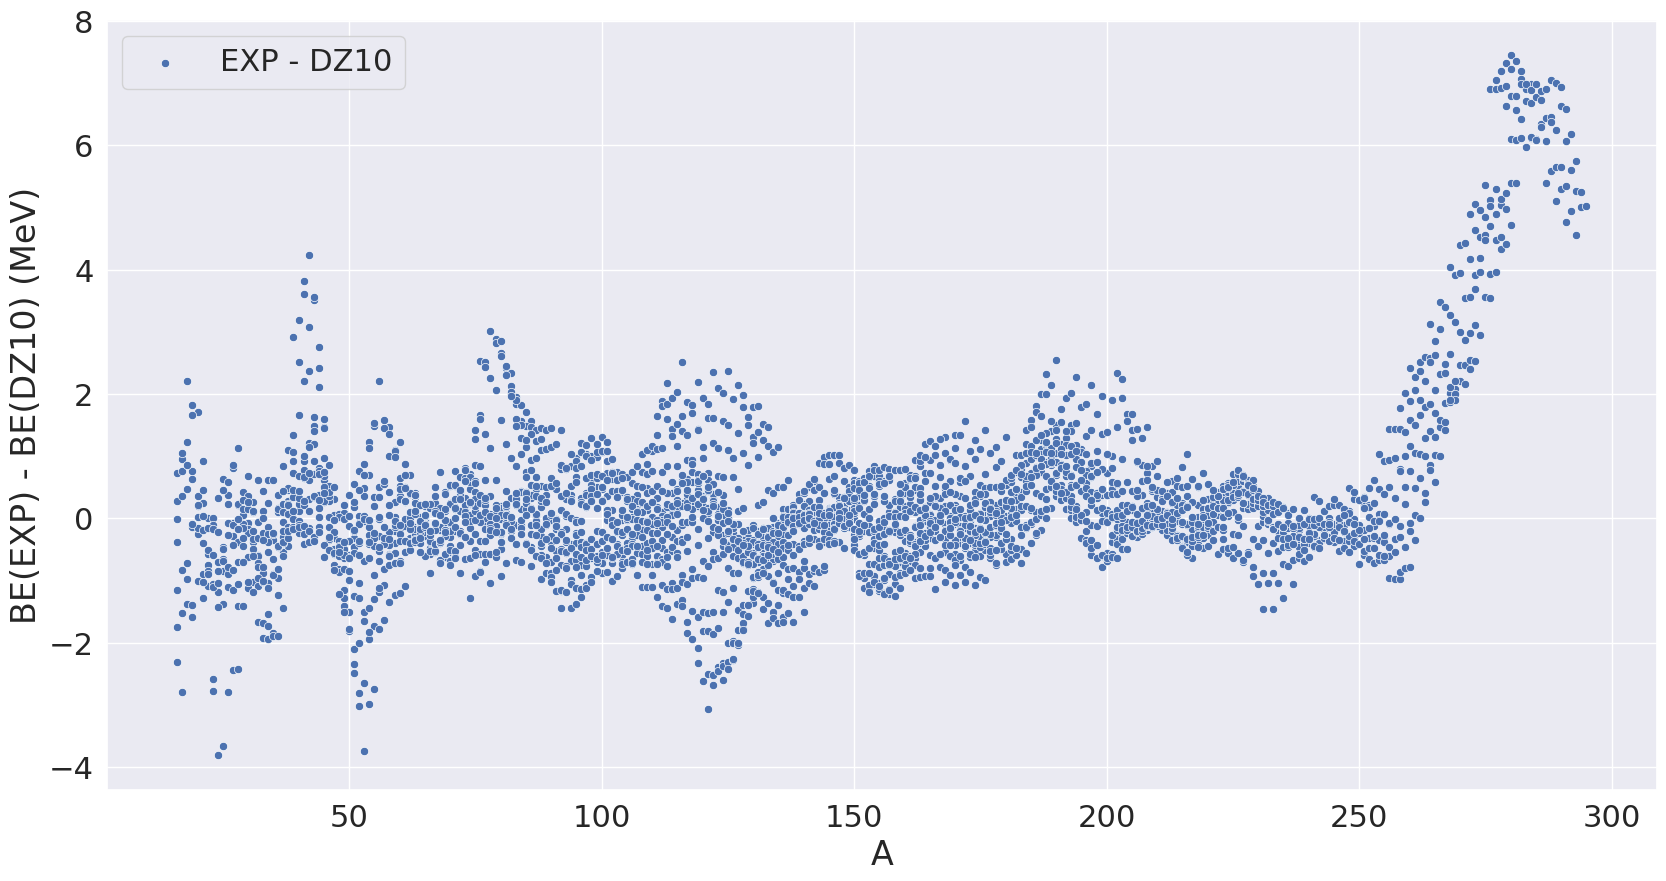

In [53]:
plt.figure(figsize =(20,10))
plt.ylabel("BE(EXP) - BE(DZ10) (MeV)")

sns.scatterplot(x="A",y="Difference_BE_DZ_AME", data=merge_data, palette="rainbow_r", label="EXP - DZ10")

### Plot AME2020 (exp) - predictions and DZ10 - predictions (trained data = every nuclei excepts for Z=10,38,54,68,82) and we compute the RMS.

RMS AME - ANN: 2.3374876607659423


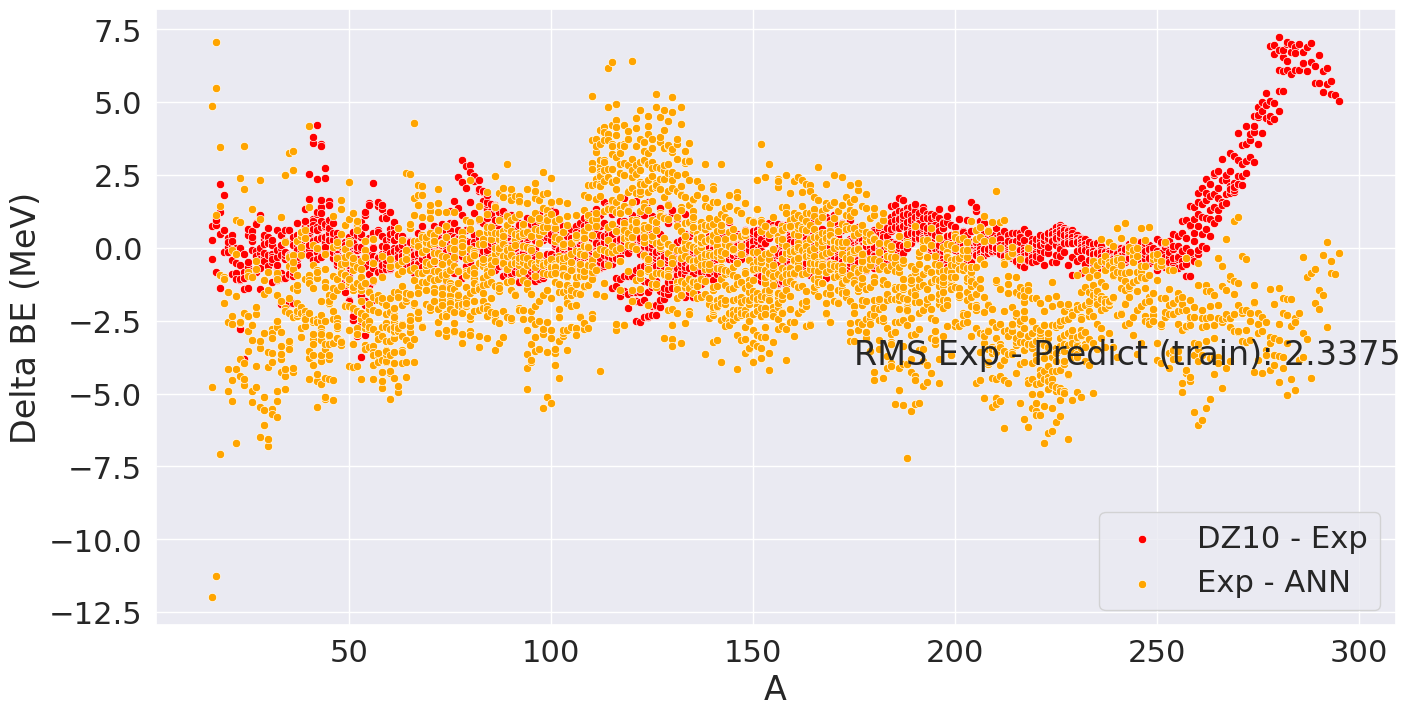

In [54]:
final_train["Difference_BE_DZ_AME"] = final_train["dz_BE"] - final_train["ame_BE"]
rms_train = np.sqrt(((final_train["Difference_BE_AME_ANN"] ** 2).sum()) / len(final_train["Difference_BE_AME_ANN"]))

print('RMS AME - ANN:', rms_train)

plt.figure(figsize =(16,8))
plt.ylabel('Delta BE (MeV)')
plt.text(175, -4,'RMS Exp - Predict (train): {:.4f}'.format(rms_train) )
sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=final_train, palette="rainbow_r", label="DZ10 - Exp", color="red")
sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=final_train, palette="rainbow_r", label="Exp - ANN", color="orange")
plt.savefig("5_plots/deltaBEexpANN.png")



### Plot AME2020 (exp) - predictions and DZ10 - predictions (test data: Z=10,38,54,68,82)

RMS AME - ANN: 2.146938389917954


<AxesSubplot:xlabel='A', ylabel='Delta BE (MeV)'>

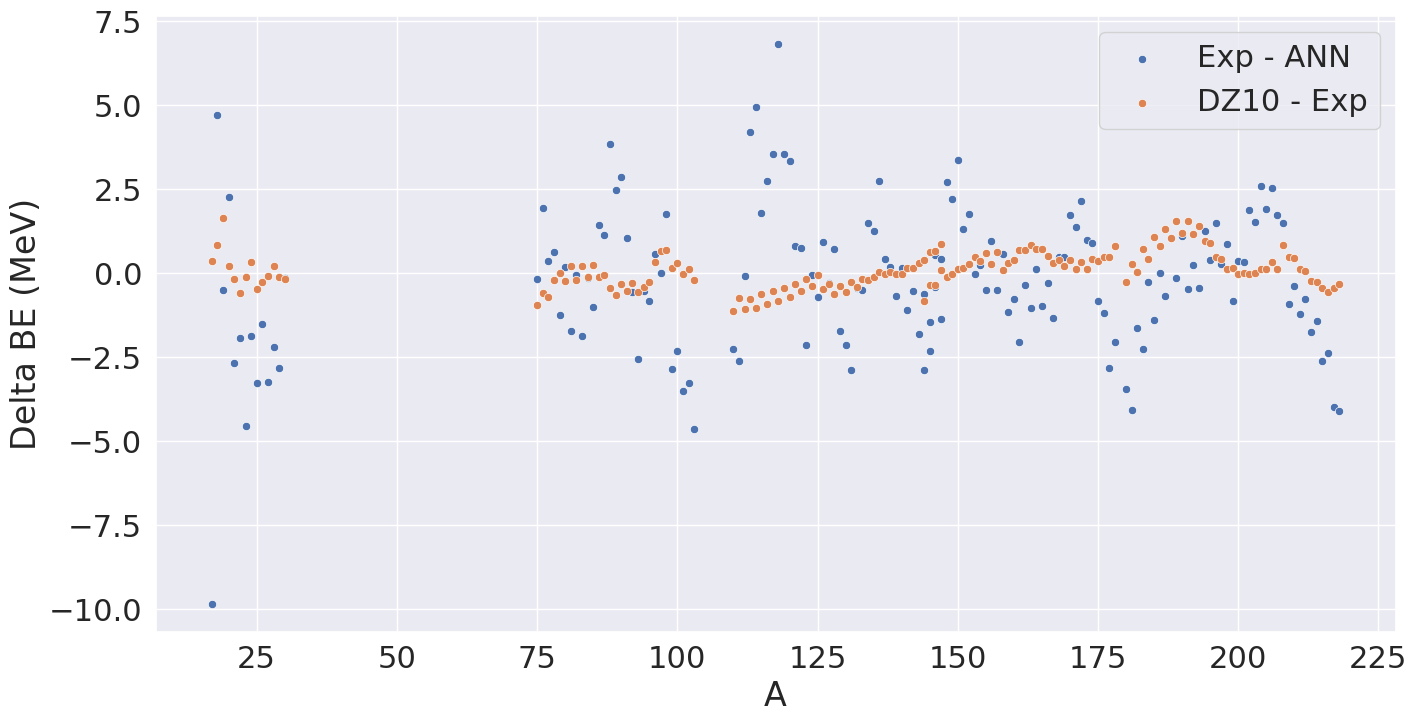

In [55]:
final_test["Difference_BE_DZ_AME"] = final_test["dz_BE"] - final_test["ame_BE"]
rms_validation = np.sqrt(((final_test["Difference_BE_AME_ANN"] ** 2).sum()) / len(final_test["Difference_BE_AME_ANN"]))

print('RMS AME - ANN:', rms_validation)



plt.figure(figsize =(16,8))

plt.ylabel('Delta BE (MeV)')
sns.scatterplot(x="A",y="Difference_BE_AME_ANN",data=final_test, palette="rainbow_r", label="Exp - ANN")
sns.scatterplot(x="A",y="Difference_BE_DZ_AME",data=final_test, palette="rainbow_r",label="DZ10 - Exp")

### Plot S2n for Z=10, 38, 54, 68, 82

 We drop certain nuclei to make graphs more readable.

In [56]:
final_test.drop(final_test[(final_test["Prediction_S2n"]<0 )].index, inplace=True)
final_test.drop(final_test[(final_test["Prediction_S2p"]<0 )].index, inplace=True)
final_test.drop(final_test[(final_test["Prediction_S2n"]>50 )].index, inplace=True)


This next function plot values of S2N for the five istopic chains with predicted data, experimental data and DZ10 model. It also saves them.

In [57]:
def plot_S2n(data, Z_values):

    for Z in Z_values:
        plt.figure(figsize=(16, 8))
        plt.title(" S2n for Z={}".format(Z))
        plt.ylabel('S2n (MeV)')
        plt.legend()
        sns.lineplot(x="N", y="ame_S2n", data=data[data['Z'] == Z], color="black", label='EXP')
        sns.lineplot(x="N", y="Prediction_S2n", data=data[data['Z'] == Z], color="orange", label='ANN')
        sns.lineplot(x="N", y="dz_S2n", data=data[data['Z'] == Z], color="red", label='DZ10')
        plt.savefig("5_plots/S2n_Z_{}.png".format(Z))
        plt.show()
    

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


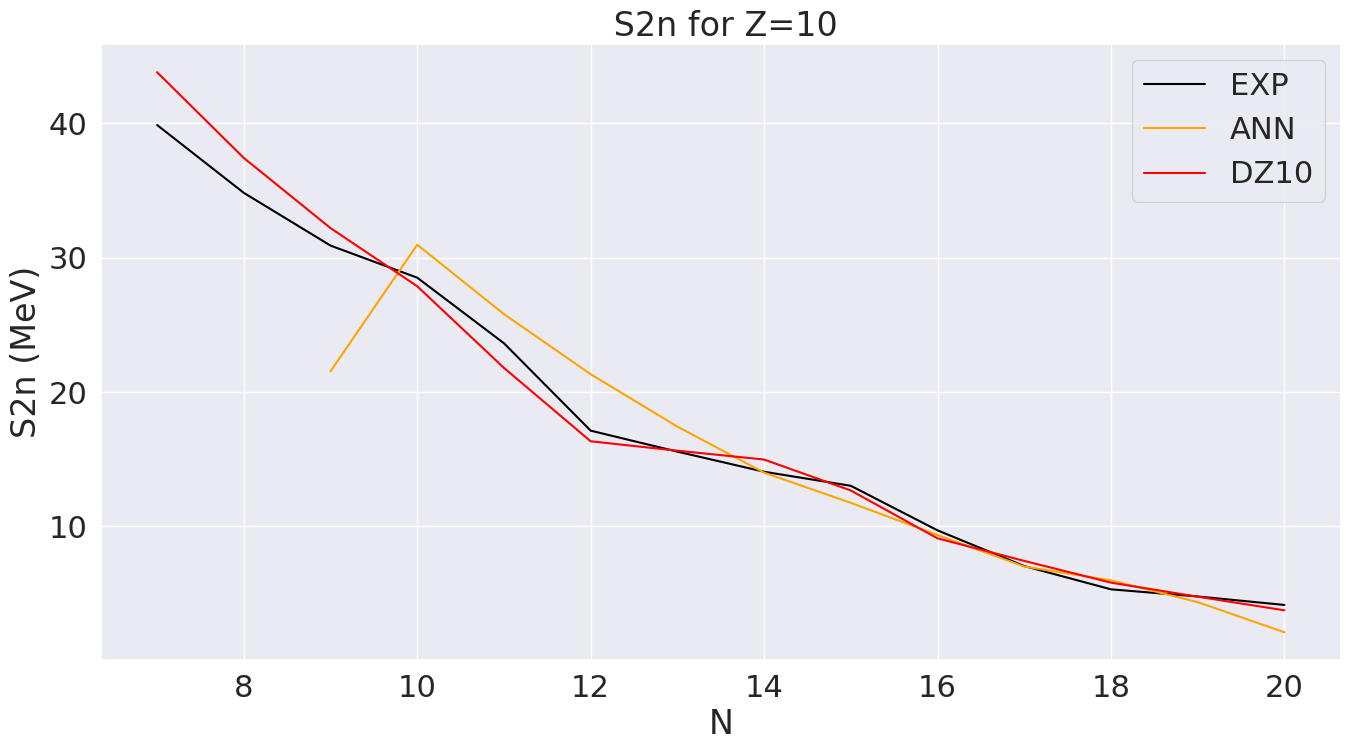

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


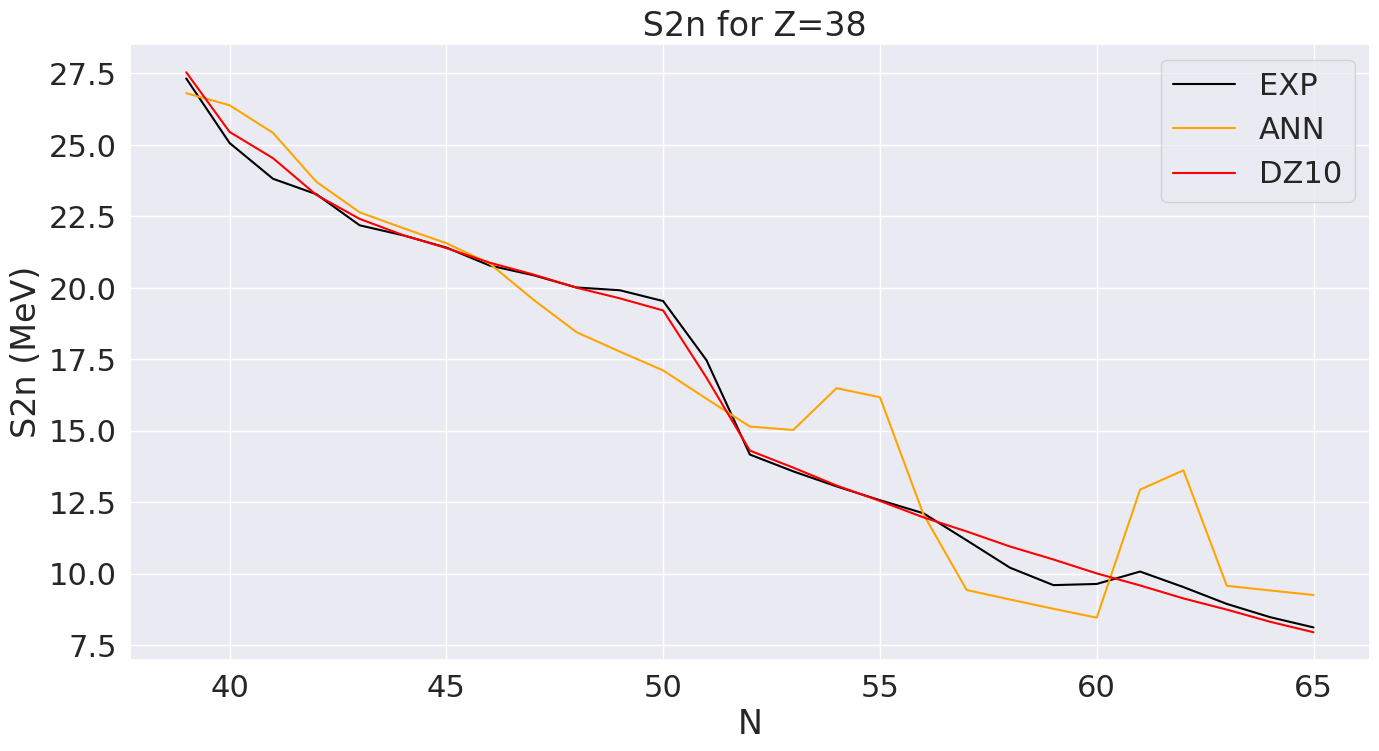

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


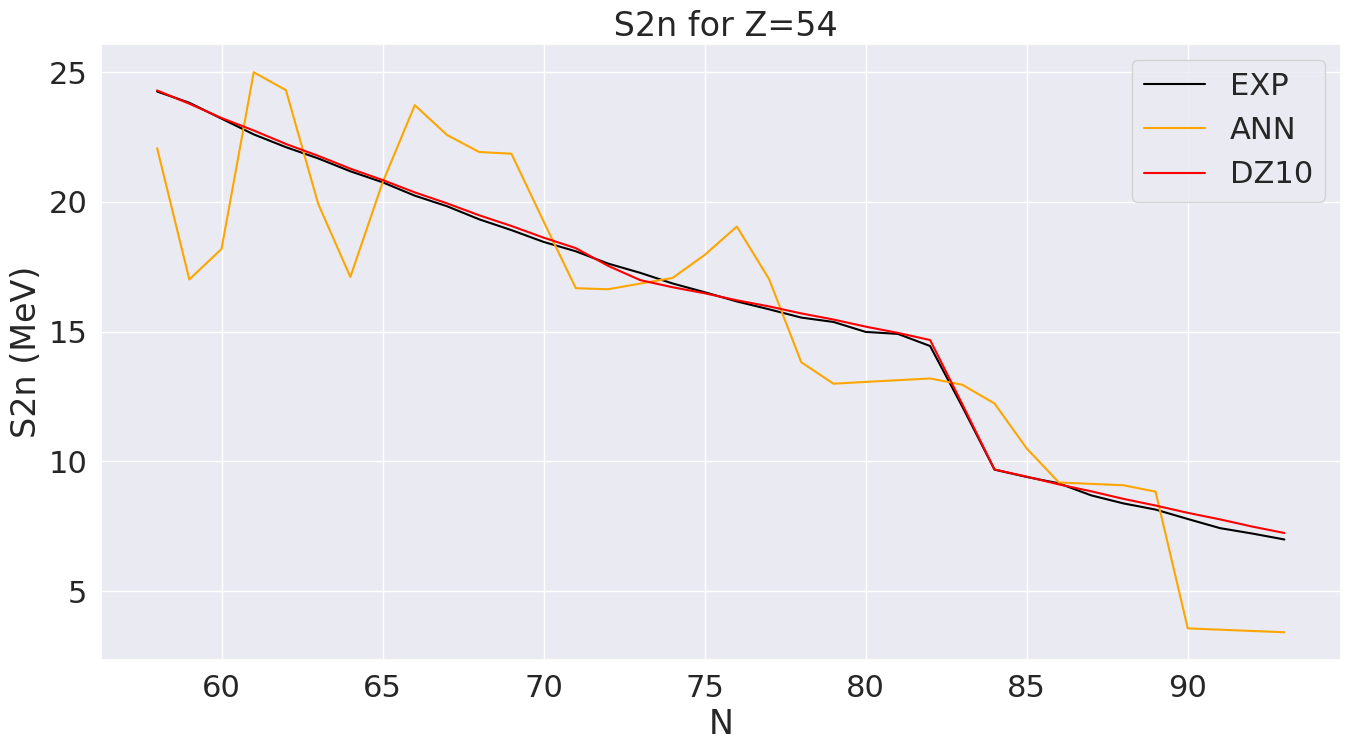

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


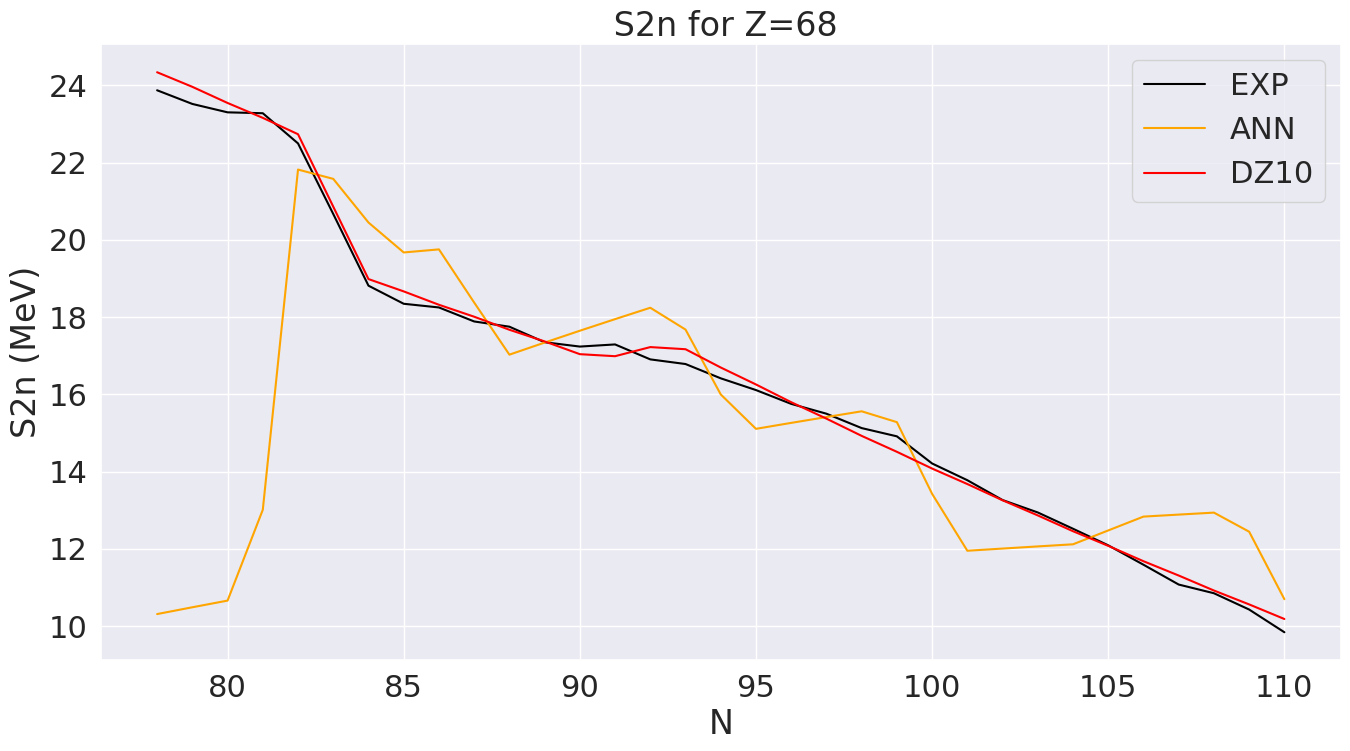

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


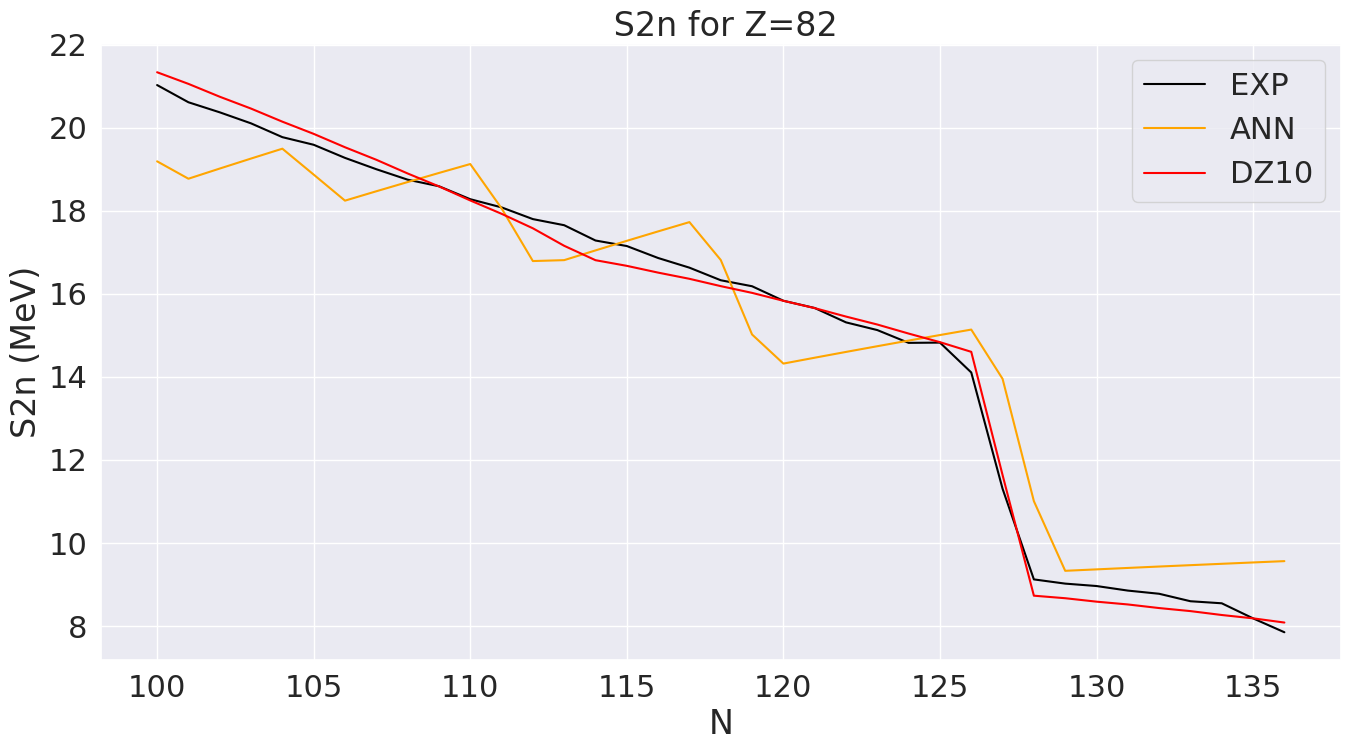

In [58]:
plot_S2n(final_test, [10, 38, 54, 68, 82])

### Plot S2n for Z=10, 38, 54, 68, 82

Same function as before, except that it is Sn that is plotted.

In [59]:
final_test.drop(final_test[(final_test["Prediction_S1n"]<0 )].index, inplace=True)
final_test.drop(final_test[(final_test["Prediction_S1n"]>50 )].index, inplace=True)


def plot_S1n(data, Z_values):

    for Z in Z_values:
        plt.figure(figsize=(16, 8))
        plt.title(" S1n for Z={}".format(Z))
        plt.ylabel('Sn (MeV)')
        plt.legend()
        sns.lineplot(x="N", y="ame_S1n", data=data[data['Z'] == Z], color="black", label='EXP')
        sns.lineplot(x="N", y="Prediction_S1n", data=data[data['Z'] == Z], color="orange", label='ANN')
        sns.lineplot(x="N", y="dz_S1n", data=data[data['Z'] == Z], color="red", label='DZ10')
        plt.savefig("5_plots/S1n_Z_{}.png".format(Z))
        plt.show()
       

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


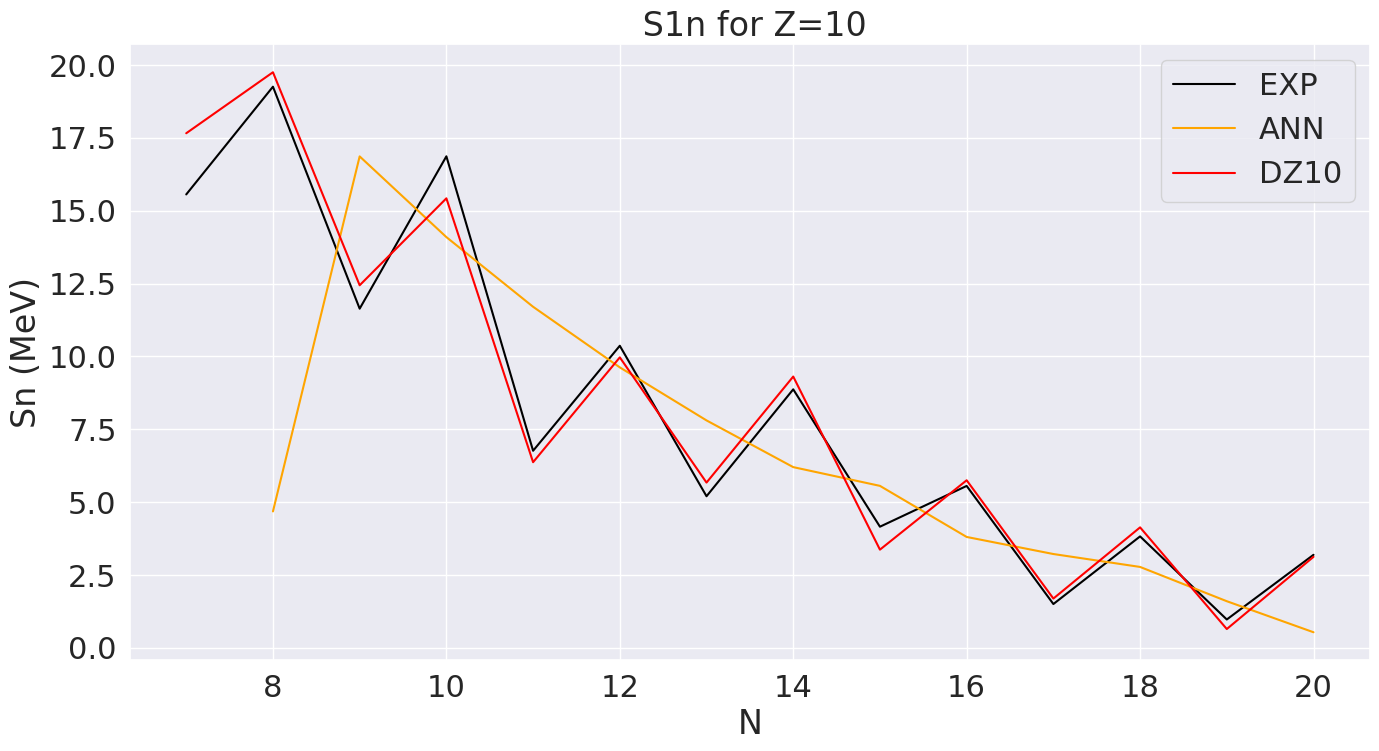

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


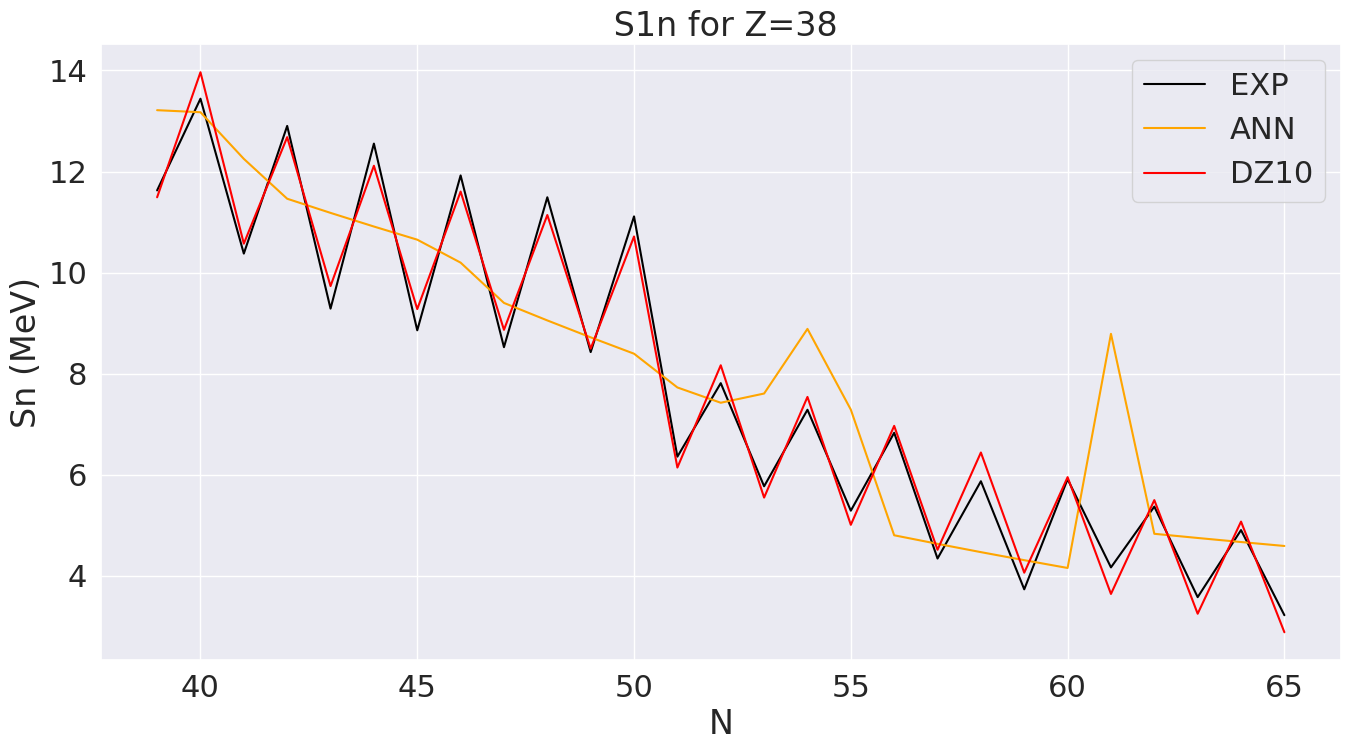

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


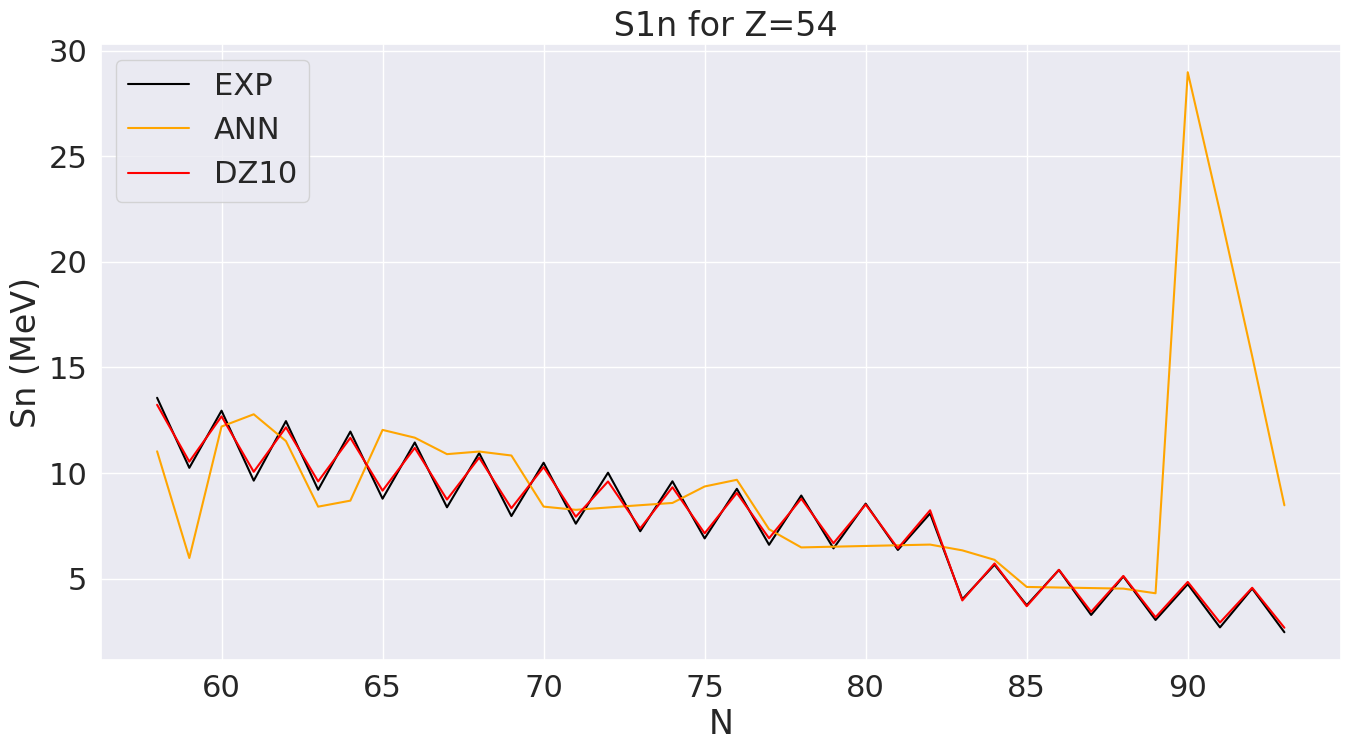

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


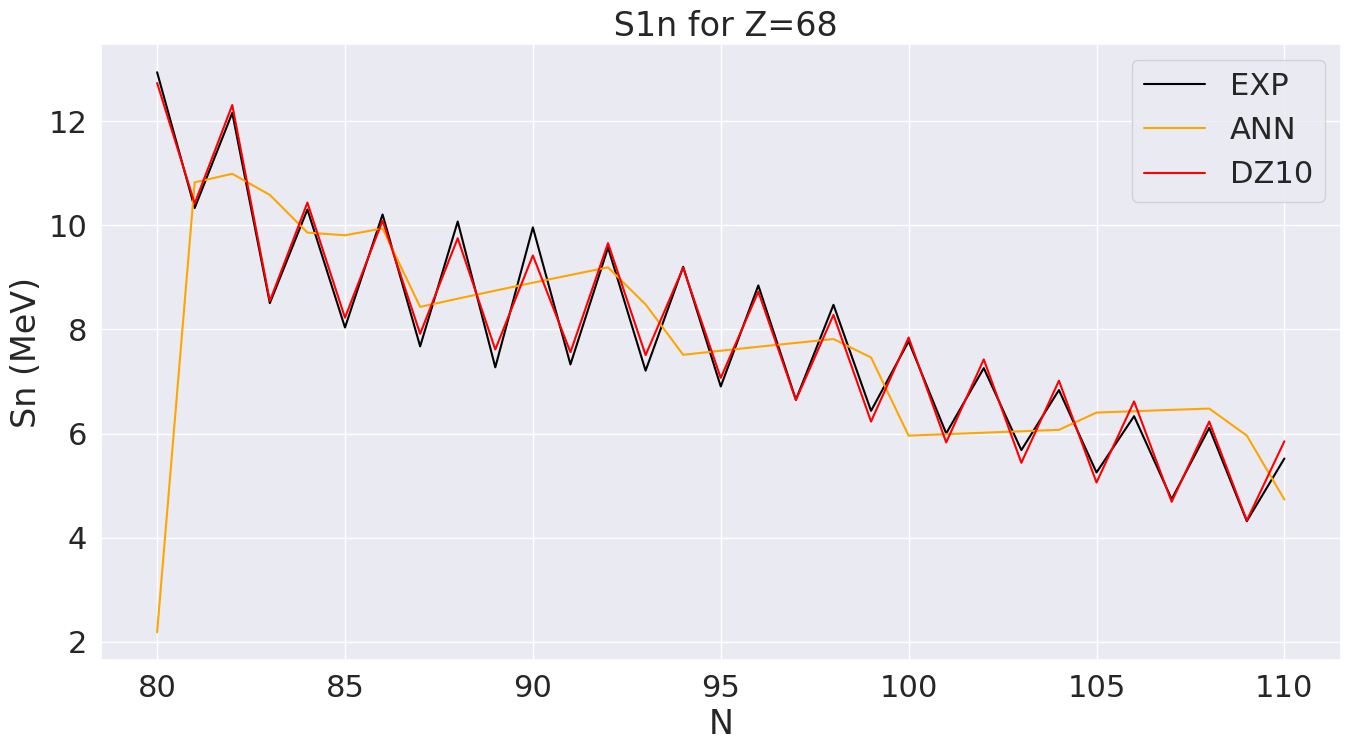

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


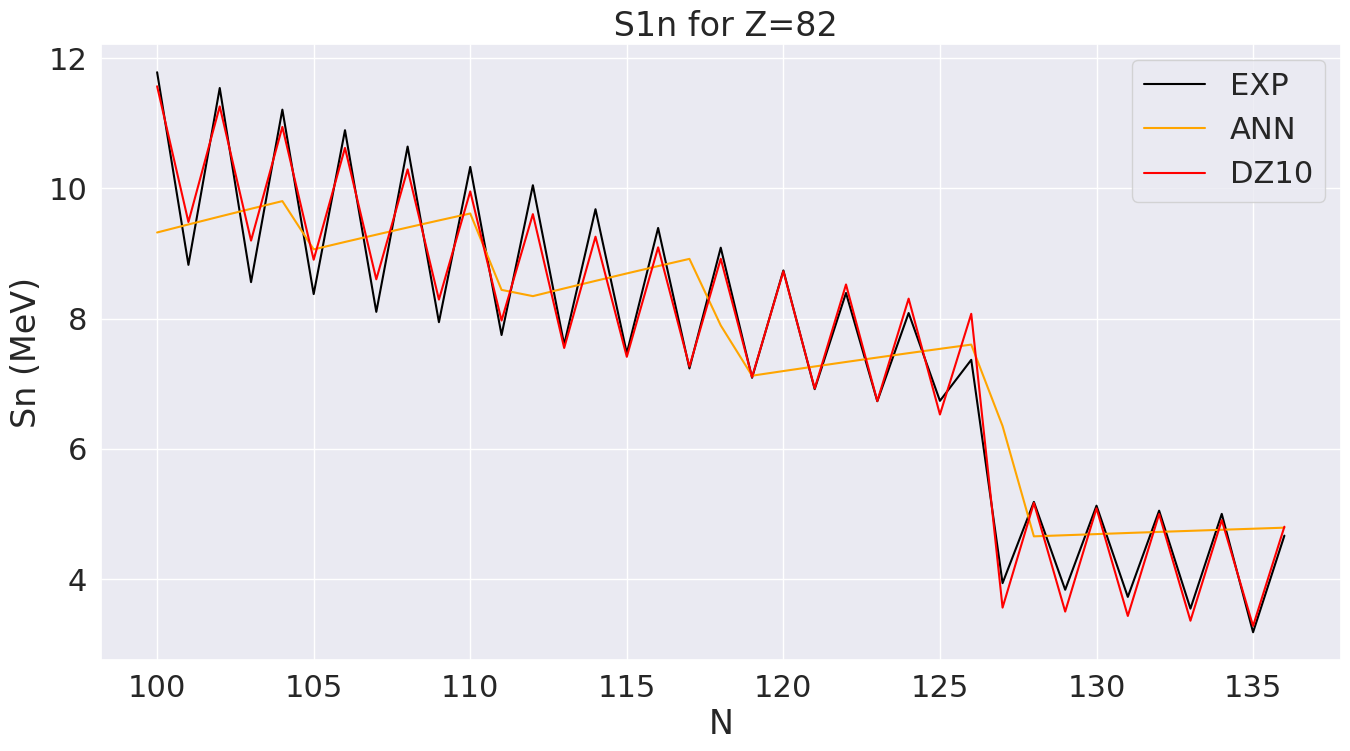

In [60]:
plot_S1n(final_test, [10, 38, 54, 68, 82])